In [2]:
%%javascript
/**********************************************************************************************
Known Mathjax Issue with Chrome - a rounding issue adds a border to the right of mathjax markup
https://github.com/mathjax/MathJax/issues/1300
A quick hack to fix this based on stackoverflow discussions: 
http://stackoverflow.com/questions/34277967/chrome-rendering-mathjax-equations-with-a-trailing-vertical-line
**********************************************************************************************/

$('.math>span').css("border-left-color","transparent")

<IPython.core.display.Javascript object>

In [3]:
%reload_ext autoreload
%autoreload 2

# MIDS - w261 Machine Learning At Scale
__Course Lead:__ Dr James G. Shanahan (__email__ Jimi via  James.Shanahan _AT_ gmail.com)

## Assignment - HW3


---
__Name:__  Chris Caudill   
__Class:__ MIDS w261 Spring 2017 Group 1     
__Email:__  CSCAUDILL@iSchool.Berkeley.edu     
__StudentId__  3032134574    __End of StudentId__     
__Week:__   3

__NOTE:__ please replace `1234567` with your student id above      
__Due Time:__ HW is due the Tuesday of the following week by 8AM (West coast time). I.e., Tuesday, Jan 31, 2017 in the case of this homework. 

# Table of Contents <a name="TOC"></a> 

1.  [HW Intructions](#1)   
2.  [HW Problems](#2)   
    3.1.   [HW3.1](#3.1)     
    3.2.   [HW3.2](#3.2)   
    3.3  [HW3.3](#3.3)   
    3.4  [HW3.4](#3.4)   
    3.5  [HW3.5](#3.5)   
    3.6  [HW3.6](#3.6)   
    3.7  [HW3.7](#3.7)   
    3.8  [HW3.8](#3.8)   
       

<a name="1"></a>
# 1 Instructions
[Back to Table of Contents](#TOC)

MIDS UC Berkeley, Machine Learning at Scale
DATSCIW261 ASSIGNMENT #3

Version 2017-26-1 


### IMPORTANT

This homework can be completed locally on your computer 

### === INSTRUCTIONS for SUBMISSIONS ===   
Follow the instructions for submissions carefully.

__<span style="color:red">NEW:</span> Going forward, each student will have a `HW-<user>` repository for all assignments.__

Click this link to enable you to create a github repo within the MIDS261 Classroom:   
https://classroom.github.com/assignment-invitations/3b1d6c8e58351209f9dd865537111ff8   
and follow the instructions to create a HW repo.

Push the following to your HW github repo into the master branch:
* Your local HW3 directory. Your repo file structure should look like this:

```
HW-<user>
    --HW3
       |__MIDS-W261-HW-03-<Student_id>.ipnb
       |__MIDS-W261-HW-03-<Student_id>.pdf
       |__some other hw3 file
    --HW4
       |__MIDS-W261-HW-04-<Student_id>.ipnb
       |__MIDS-W261-HW-04-<Student_id>.pdf
       |__some other hw4 file
    etc..
```    

<a name="2"></a>
## HW3.0.
1. How do you merge  two sorted  lists/arrays of records of the form [key, value]?
1. Where is this  used in Hadoop MapReduce? [Hint within the shuffle]
1. What is  a combiner function in the context of Hadoop? 
1. Give an example where it can be used and justify why it should be used in the context of this problem.
1. What is the Hadoop shuffle?

<a name="2"></a>
### HW3.0 Answers
1. With the form [key, value], we merge two sorted lists using Priority Queue. This is initially done my establishing 3 pointers: One at the the start of each sorted list, and one at start of the merged list. We start by picking off the smallest element of the two sorted lists and add them to the merged list, incrementing the pointers along the way until we reach the end of the two sorted lists.
1. sorting of merged lists occurs in the combiners
1. A combiner is used to merge the intermediary lists generated from the mappers.
1. In the context of our wordcount example, the mappers will intake records and establish an intermediary counts for each word that occurs. Although the mappers can technically perform local aggregation using arrays, a single word could still occur across multiple records or mappers. The combiner is used in this context to take those intermediary arrays and merge them into a single list. This is useful because we will be utilizing less memory by maintaining fewer lists of terms/counts.
1. The Hadoop shuffle is the entire process that happens between the mapper output and the reducer input. This includes:
        a. Partition, sort, combine
        b. Mergesort
        c. Send to reducer
        d. Mergesort partition files
        e. Stream to reducer
        


<a name="3.1"></a>
## HW3.1 consumer complaints dataset: Use Counters to do EDA (exploratory data analysis and to monitor progress)
Counters are lightweight objects in Hadoop that allow you to keep track of system progress in both the map and reduce stages of processing. By default, Hadoop defines a number of standard counters in "groups"; these show up in the jobtracker webapp, giving you information such as "Map input records", "Map output records", etc. 

While processing information/data using MapReduce job, it is a challenge to monitor the progress of parallel threads running across nodes of distributed clusters. Moreover, it is also complicated to distinguish between the data that has been processed and the data which is yet to be processed. The MapReduce Framework offers a provision of user-defined Counters, which can be effectively utilized to monitor the progress of data across nodes of distributed clusters.

Use the Consumer Complaints  Dataset provide here to complete this question:


     https://www.dropbox.com/s/vbalm3yva2rr86m/Consumer_Complaints.csv?dl=0

The consumer complaints dataset consists of diverse consumer complaints, which have been reported across the United States regarding various types of loans. The dataset consists of records of the form:

Complaint ID,Product,Sub-product,Issue,Sub-issue,State,ZIP code,Submitted via,Date received,Date sent to company,Company,Company response,Timely response?,Consumer disputed?

Here’s is the first few lines of the  of the Consumer Complaints  Dataset:
```
Complaint ID,Product,Sub-product,Issue,Sub-issue,State,ZIP code,Submitted via,Date received,Date sent to company,Company,Company response,Timely response?,Consumer disputed?
1114245,Debt collection,Medical,Disclosure verification of debt,Not given enough info to verify debt,FL,32219,Web,11/13/2014,11/13/2014,"Choice Recovery, Inc.",Closed with explanation,Yes,
1114488,Debt collection,Medical,Disclosure verification of debt,Right to dispute notice not received,TX,75006,Web,11/13/2014,11/13/2014,"Expert Global Solutions, Inc.",In progress,Yes,
1114255,Bank account or service,Checking account,Deposits and withdrawals,,NY,11102,Web,11/13/2014,11/13/2014,"FNIS (Fidelity National Information Services, Inc.)",In progress,Yes,
1115106,Debt collection,"Other (phone, health club, etc.)",Communication tactics,Frequent or repeated calls,GA,31721,Web,11/13/2014,11/13/2014,"Expert Global Solutions, Inc.",In progress,Yes,
```
User-defined Counters

Now, let’s use Hadoop Counters to identify the number of complaints pertaining to debt collection, mortgage and other categories (all other categories get lumped into this one) in the consumer complaints dataset. Basically produce the distribution of the Product column in this dataset using counters (limited to 3 counters here).

Hadoop offers Job Tracker, an UI tool to determine the status and statistics of all jobs. Using the job tracker UI, developers can view the Counters that have been created. Screenshot your  job tracker UI as your job completes and include it here. Make sure that your user defined counters are visible. 

In [2]:
# Create HDFS directories
!mkdir ConsumerComplaints

mkdir: cannot create directory `ConsumerComplaints': File exists


In [20]:
# Put the data into HDFS
!curl 'https://www.dropbox.com/s/vbalm3yva2rr86m/Consumer_Complaints.csv?dl=0#' -L -o ccd.csv
! cp ./ccd.csv ./ConsumerComplaints/

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 48.5M  100 48.5M    0     0  4774k      0  0:00:10  0:00:10 --:--:-- 5558k


In [47]:
%%writefile complaintCountsMapper.py
#!/usr/bin/env python

# # START STUDENT CODE HW31MAPPER

import sys
from collections import defaultdict

# Set up counters to monitor/understand the number of times a mapper task is run

prods = defaultdict(int)

for line in sys.stdin:
    if 'debt collection' in line.lower():
        prods['debt collection'] += 1
        sys.stderr.write("reporter:counter:HW3.1 Mapper Debt Collection Counters,Calls,1\n")
        
    elif 'mortgage' in line.lower():
        prods['mortgage'] += 1
        sys.stderr.write("reporter:counter:HW3.1 Mapper Mortgage Counters,Calls,1\n")
        
    else:
        prods['other'] += 1
        sys.stderr.write("reporter:counter:HW3.1 Mapper Other Counters,Calls,1\n")
        
for key in sorted(prods):
    print '%s\t%s' % (key, prods[key])

# END STUDENT CODE HW31MAPPER

Overwriting complaintCountsMapper.py


**Not required to create reducer, but for the sake of continuity, I've created one**

In [40]:
%%writefile complaintCountsReducer.py
#!/usr/bin/env python

# START STUDENT CODE HW31REDUCER

import sys
# Set up counters to monitor/understand the number of times a reducer task is run
sys.stderr.write("reporter:counter:HW3.1 Reducer Counters,Calls,1\n")

d = {}

# For each line from the mapper output, split the three attributes 
# Spam/Ham classification, key term, value count
for line in sys.stdin:
    key,value = line.split("\t")
    
    # check if docClass + key term combination exist in dictionary
    # if so, update the term count value
    if key in d:
        d[key] += int(value)
        
    # if combination does not exist, add it to the dictionary
    else:
        d[key] = int(value)
        
# for each value in the dictionary, print the 3 attributes in a 
# way that they can later be sorted appropriately
for key, value in d.iteritems():
    print '%s\t%s' % (key, value)

# END STUDENT CODE HW31REDUCER

Overwriting complaintCountsReducer.py


**Update Security of Mapper and Reducer**

In [41]:
!chmod a+x complaintCountsMapper.py
!chmod a+x complaintCountsReducer.py

**Execute Hadoop calls**

In [46]:
# Hadoop command
# START STUDENT CODE HW31HADOOP

!hdfs dfs -rm ccd.csv 
!hdfs dfs -copyFromLocal ccd.csv
!hdfs dfs -rm -r cc-output

!hadoop jar /usr/lib/hadoop-0.20-mapreduce/contrib/streaming/hadoop-streaming-2.6.0-mr1-cdh5.8.0.jar \
  -files complaintCountsMapper.py,complaintCountsReducer.py \
  -mapper complaintCountsMapper.py \
  -reducer complaintCountsReducer.py \
  -combiner complaintCountsReducer.py \
  -input ccd.csv \
  -output cc-output  \
  -numReduceTasks 1 

# END STUDENT CODE HW31HADOOP

Deleted ccd.csv
Deleted cc-output
packageJobJar: [] [/usr/lib/hadoop-mapreduce/hadoop-streaming-2.6.0-cdh5.8.0.jar] /tmp/streamjob5158676712758093896.jar tmpDir=null
17/01/28 13:33:58 INFO client.RMProxy: Connecting to ResourceManager at /0.0.0.0:8032
17/01/28 13:33:58 INFO client.RMProxy: Connecting to ResourceManager at /0.0.0.0:8032
17/01/28 13:33:58 INFO mapred.FileInputFormat: Total input paths to process : 1
17/01/28 13:33:58 INFO mapreduce.JobSubmitter: number of splits:2
17/01/28 13:33:58 INFO mapreduce.JobSubmitter: Submitting tokens for job: job_1484544278544_0363
17/01/28 13:33:59 INFO impl.YarnClientImpl: Submitted application application_1484544278544_0363
17/01/28 13:33:59 INFO mapreduce.Job: The url to track the job: http://quickstart.cloudera:8088/proxy/application_1484544278544_0363/
17/01/28 13:33:59 INFO mapreduce.Job: Running job: job_1484544278544_0363
17/01/28 13:34:05 INFO mapreduce.Job: Job job_1484544278544_0363 running in uber mode : false
17/01/28 13:34:05 IN

**Check output counts**

In [48]:
!hdfs dfs -cat cc-output/part-0000* > cc_counts.txt
!head cc_counts.txt

debt collection	44372
other	142745
mortgage	125796


<a name="3.2"></a>
### HW 3.2 Analyze the performance of your Mappers, Combiners and Reducers using Counters

For this brief study the Input file will be one record (the next line only):    
`foo foo quux labs foo bar quux`


__3.2.A__     
Perform a word count analysis of this single record dataset using a Mapper and Reducer based WordCount (i.e., no combiners are used here) using user defined Counters to count up how many times the mapper and reducer are called. What is the value of your user defined Mapper Counter, and Reducer Counter after completing this word count job. The answer  should be 1 and 4 respectively. Please explain.

__3.2.B__   
Please use mulitple mappers and reducers for these jobs (at least 2 mappers and 2 reducers).
Perform a word count analysis of the Issue column of the Consumer Complaints  Dataset using a Mapper and Reducer based WordCount (i.e., no combiners used anywhere)  using user defined Counters to count up how many time the mapper and reducer are called. What is the value of your user defined Mapper Counter, and Reducer Counter after completing your word count job. 

__3.2.C__     
Perform a word count analysis of the Issue column of the Consumer Complaints  Dataset using a Mapper, Reducer, and standalone combiner (i.e., not an in-memory combiner) based WordCount using user defined Counters to count up how many time the mapper, combiner, reducer are called. What is the value of your user defined Mapper Counter, and Reducer Counter after completing your word count job. 

Using a single reducer: 
- What are the top 50 most frequent terms in your word count analysis?    
- Present the top 50 terms and their frequency and their relative frequency. If there are ties please sort the tokens in alphanumeric/string order.    
- Present bottom 10 tokens (least frequent items). 

__NOTE:__ You can use: `WORD_RE = re.compile(r"[\w']+")` to tokenize.

### 3.2.A SOLUTION

In [70]:
%%writefile mapper3.2.A.py
#!/usr/bin/env python
# START STUDENT CODE HW32AMAPPER

import sys
from collections import defaultdict

# Set up counters to monitor/understand the number of times a mapper task is run
sys.stderr.write("reporter:counter:HW3.2.A Mapper Counters,Calls,1\n")

wordCounts = defaultdict(int)

for line in sys.stdin:
    words = line.split()
    for word in words:
            print '%s\t%s' % (word, 1)
#         if word in wordCounts:
#             wordCounts[word] += 1
#         else:
#             wordCounts[word] += 1

# for key in sorted(wordCounts):
#     print '%s\t%s' % (key, wordCounts[key])

# END STUDENT CODE HW32AMAPPER

Overwriting mapper3.2.A.py


In [71]:
%%writefile reducer3.2.A.py
#!/usr/bin/env python
# START STUDENT CODE HW32AREDUCER

import sys
# Set up counters to monitor/understand the number of times a reducer task is run
sys.stderr.write("reporter:counter:HW3.2.A Reducer Counters,Calls,1\n")

d = {}

# For each line from the mapper output, split the three attributes 
# Spam/Ham classification, key term, value count
for line in sys.stdin:
    key,value = line.split("\t")
    
    # check if docClass + key term combination exist in dictionary
    # if so, update the term count value
    if key in d:
        d[key] += int(value)
        
    # if combination does not exist, add it to the dictionary
    else:
        d[key] = int(value)
        
# for each value in the dictionary, print the 3 attributes in a 
# way that they can later be sorted appropriately
for key, value in d.iteritems():
    print '%s\t%s' % (key, value)

# END STUDENT CODE HW32AREDUCER

Overwriting reducer3.2.A.py


**Create input file**

In [61]:
!echo "foo foo quux labs foo bar quux" > ./HW3.2.txt

In [82]:
# Hadoop command
# START STUDENT CODE HW32AHADOOP

#update security on mapper/reducer
!chmod a+x mapper3.2.A.py
!chmod a+x reducer3.2.A.py

!hdfs dfs -rm HW3.2.txt 
!hdfs dfs -copyFromLocal HW3.2.txt
!hdfs dfs -rm -r HW3.2.A-output

!hadoop jar /usr/lib/hadoop-0.20-mapreduce/contrib/streaming/hadoop-streaming-2.6.0-mr1-cdh5.8.0.jar \
  -files mapper3.2.A.py,reducer3.2.A.py \
  -mapper mapper3.2.A.py \
  -reducer reducer3.2.A.py \
  -input HW3.2.txt \
  -output HW3.2.A-output \
  -numReduceTasks 4

# END STUDENT CODE HW32AHADOOP

Deleted HW3.2.txt
rm: `HW3.2.A-output': No such file or directory
packageJobJar: [] [/usr/lib/hadoop-mapreduce/hadoop-streaming-2.6.0-cdh5.8.0.jar] /tmp/streamjob4205658107599752123.jar tmpDir=null
17/01/28 14:36:41 INFO client.RMProxy: Connecting to ResourceManager at /0.0.0.0:8032
17/01/28 14:36:41 INFO client.RMProxy: Connecting to ResourceManager at /0.0.0.0:8032
17/01/28 14:36:42 INFO mapred.FileInputFormat: Total input paths to process : 1
17/01/28 14:36:42 INFO mapreduce.JobSubmitter: number of splits:2
17/01/28 14:36:42 INFO mapreduce.JobSubmitter: Submitting tokens for job: job_1484544278544_0371
17/01/28 14:36:42 INFO impl.YarnClientImpl: Submitted application application_1484544278544_0371
17/01/28 14:36:42 INFO mapreduce.Job: The url to track the job: http://quickstart.cloudera:8088/proxy/application_1484544278544_0371/
17/01/28 14:36:42 INFO mapreduce.Job: Running job: job_1484544278544_0371
17/01/28 14:36:49 INFO mapreduce.Job: Job job_1484544278544_0371 running in uber m

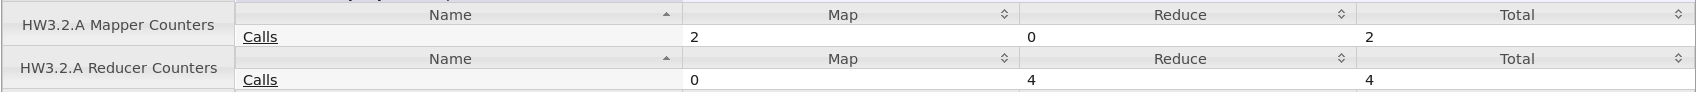

In [107]:
# INSERT SCREENSHOT OF JOB TRACKER UI COUNTERS
from IPython.display import Image, HTML
Image('HW32.png')

#### 3.2.A EXPLANATION
For mappers, I accepted the defaults and used 2. For reducers, I specified for 4 to be used. These numbers will change based on the settings and configuration that is used within the Hadoop Streaming calls.

### 3.2.B SOLUTION

**3.2.B Mapper**

In [108]:
%%writefile mapper3.2.B.py
#!/usr/bin/env python
# START STUDENT CODE HW32BMAPPER

import sys
import csv
from collections import defaultdict
import re

# Set up counters to monitor/understand the number of times a mapper task is run
sys.stderr.write("reporter:counter:HW3.2.B Mapper Counters,Calls,1\n")

issueList = defaultdict(int)

ccd = csv.reader(sys.stdin)
for row in ccd:
    issue = row[3]
    if len(issue) > 0 and issue != 'Issue':
        words = re.findall(r'[a-z]+', issue.lower())
        for word in words:
            if word in issueList:
                issueList[word] +=1
            else:
                issueList[word] = 1
    
for key in sorted(issueList):
    print '%s\t%s' % (key, issueList[key])



# END STUDENT CODE HW32BMAPPER

Overwriting mapper3.2.B.py


**3.2.B Reducer**

In [109]:
%%writefile reducer3.2.B.py
#!/usr/bin/env python
# START STUDENT CODE HW32BREDUCER

import sys
# Set up counters to monitor/understand the number of times a reducer task is run
sys.stderr.write("reporter:counter:HW3.2.B Reducer Counters,Calls,1\n")

d = {}

# For each line from the mapper output, split the three attributes 
# Spam/Ham classification, key term, value count
for line in sys.stdin:
    key,value = line.split("\t")
    
    # check if docClass + key term combination exist in dictionary
    # if so, update the term count value
    if key in d:
        d[key] += int(value)
        
    # if combination does not exist, add it to the dictionary
    else:
        d[key] = int(value)
        
# for each value in the dictionary, print the 3 attributes in a 
# way that they can later be sorted appropriately
for key, value in d.iteritems():
    print '%s\t%s' % (key, value)

# END STUDENT CODE HW32BREDUCER

Overwriting reducer3.2.B.py


**3.2.B Hadoop Calls**

In [110]:
# Hadoop command
# START STUDENT CODE HW32BHADOOP

!chmod a+x mapper3.2.B.py
!chmod a+x reducer3.2.B.py

!hdfs dfs -rm ccd.csv 
!hdfs dfs -copyFromLocal ccd.csv
!hdfs dfs -rm -r HW3.2.B-output

!hadoop jar /usr/lib/hadoop-0.20-mapreduce/contrib/streaming/hadoop-streaming-2.6.0-mr1-cdh5.8.0.jar \
  -files mapper3.2.B.py,reducer3.2.B.py \
  -reducer reducer3.2.B.py \
  -mapper mapper3.2.B.py \
  -input ccd.csv \
  -output HW3.2.B-output \
  -numReduceTasks 4

# END STUDENT CODE HW32BHADOOP

Deleted ccd.csv
Deleted HW3.2.B-output
packageJobJar: [] [/usr/lib/hadoop-mapreduce/hadoop-streaming-2.6.0-cdh5.8.0.jar] /tmp/streamjob3908761271563178578.jar tmpDir=null
17/01/29 15:30:05 INFO client.RMProxy: Connecting to ResourceManager at /0.0.0.0:8032
17/01/29 15:30:06 INFO client.RMProxy: Connecting to ResourceManager at /0.0.0.0:8032
17/01/29 15:30:06 INFO mapred.FileInputFormat: Total input paths to process : 1
17/01/29 15:30:06 INFO mapreduce.JobSubmitter: number of splits:2
17/01/29 15:30:06 INFO mapreduce.JobSubmitter: Submitting tokens for job: job_1484544278544_0417
17/01/29 15:30:07 INFO impl.YarnClientImpl: Submitted application application_1484544278544_0417
17/01/29 15:30:07 INFO mapreduce.Job: The url to track the job: http://quickstart.cloudera:8088/proxy/application_1484544278544_0417/
17/01/29 15:30:07 INFO mapreduce.Job: Running job: job_1484544278544_0417
17/01/29 15:30:13 INFO mapreduce.Job: Job job_1484544278544_0417 running in uber mode : false
17/01/29 15:30:

## 3.2.B Answer

In [111]:
# 3.2.B OUTPUT/ANSWER
!hdfs dfs -cat HW3.2.B-output/part-0000* > HW3.2.B_counts.txt
!cat HW3.2.B_counts.txt

owed	17972
caused	5663
sale	139
acct	163
your	3844
payoff	1155
incorrect	29133
management	16205
delinquent	1061
for	929
transfer	597
the	6248
to	8401
unable	8178
issue	1098
checks	75
available	274
applied	139
workout	350
was	274
company	4858
processing	243
wrong	169
disputes	6938
issuance	640
debt	27874
by	5663
a	3503
on	29069
account	57448
service	1518
i	925
of	13983
didn	925
cash	240
repay	1647
verification	7655
making	3226
closing	19000
or	40508
originator	8625
scam	566
communication	8671
loan	119630
improper	4966
rate	3431
apply	118
disclosures	64
underwriting	2774
out	1242
fee	3198
monitoring	1453
score	4357
mortgage	8625
illegal	2964
decision	2774
missing	64
credited	92
lender	2165
investigation	4858
bank	202
statements	3621
dealing	1944
modification	70487
lease	6337
cancelling	2795
shopping	672
plans	350
get	4357
funds	5663
marketing	1193
reporting	6559
problems	9484
withdrawals	10555
servicing	36767
report	34903
line	1732
payment	92
card	4405
advance	240
sending	3226
transactio

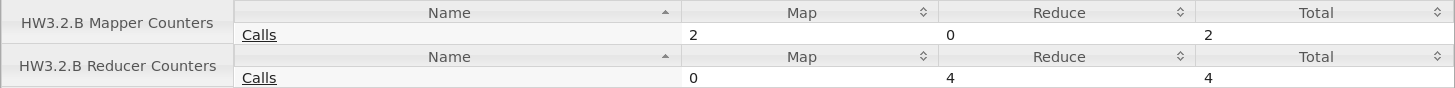

In [129]:
# INSERT SCREENSHOT OF JOB TRACKER UI COUNTERS
from IPython.display import Image, HTML
Image('HW32B.png')

### 3.2.C SOLUTION

**3.2.C Mapper**

In [117]:
%%writefile mapper3.2.C.py
#!/usr/bin/env python
# START STUDENT CODE HW32CMAPPER

import sys
import csv
import re

# Set up counters to monitor/understand the number of times a mapper task is run
sys.stderr.write("reporter:counter:HW3.2.B Mapper Counters,Calls,1\n")

ccd = csv.reader(sys.stdin)
for row in ccd:
    issue = row[3]
    if len(issue) > 0 and issue != 'Issue':
        words = re.findall(r'[a-z]+', issue.lower())
        for word in words:
            print '%s\t%s' % (word, 1)

# END STUDENT CODE HW32CMAPPER

Overwriting mapper3.2.C.py


**3.2.C Combiner**

In [122]:
%%writefile combiner3.2.C.py
#!/usr/bin/env python
# START STUDENT CODE HW32CCOMBINER
import sys
from collections import defaultdict

# Set up counters to monitor/understand the number of times a reducer task is run
sys.stderr.write("reporter:counter:HW3.2.C Combiner Counters,Calls,1\n")

issueDict = defaultdict(int)

for line in sys.stdin:
    word,count = line.split("\t")
    if word in issueDict:
        issueDict[word] += int(count)
    else:
        issueDict[word] = int(count)        

for key in sorted(issueDict):
    print '%s\t%s' % (key, issueDict[key])

# END STUDENT CODE HW32CCOMBINER

Overwriting combiner3.2.C.py


**3.2.C Reducer**

In [123]:
%%writefile reducer3.2.C.py
#!/usr/bin/env python
# START STUDENT CODE HW32CREDUCER

import sys
# Set up counters to monitor/understand the number of times a reducer task is run
sys.stderr.write("reporter:counter:HW3.2.C Reducer Counters,Calls,1\n")

d = {}

# For each line from the mapper output, split the three attributes 
# Spam/Ham classification, key term, value count
for line in sys.stdin:
    key,value = line.split("\t",1)
    
    # check if docClass + key term combination exist in dictionary
    # if so, update the term count value
    if key in d:
        d[key] += int(value)
        
    # if combination does not exist, add it to the dictionary
    else:
        d[key] = int(value)
        
# for each value in the dictionary, print the 3 attributes in a 
# way that they can later be sorted appropriately
for key, value in d.iteritems():
    print '%s\t%s' % (key, value)

# END STUDENT CODE HW32CREDUCER

Overwriting reducer3.2.C.py


**3.2.C Hadoop Calls**

In [124]:
# Hadoop command
# START STUDENT CODE HW32CHADOOP

!chmod a+x mapper3.2.C.py
!chmod a+x combiner3.2.C.py
!chmod a+x reducer3.2.C.py

!hdfs dfs -rm ccd.csv 
!hdfs dfs -copyFromLocal ccd.csv
!hdfs dfs -rm -r HW3.2.C-output

!hadoop jar /usr/lib/hadoop-0.20-mapreduce/contrib/streaming/hadoop-streaming-2.6.0-mr1-cdh5.8.0.jar \
  -files mapper3.2.C.py,combiner3.2.C.py,reducer3.2.C.py \
  -reducer reducer3.2.C.py \
  -combiner combiner3.2.C.py \
  -mapper mapper3.2.C.py \
  -input ccd.csv \
  -output HW3.2.C-output \
  -numReduceTasks 1


# END STUDENT CODE HW32CHADOOP

Deleted ccd.csv
Deleted HW3.2.C-output
packageJobJar: [] [/usr/lib/hadoop-mapreduce/hadoop-streaming-2.6.0-cdh5.8.0.jar] /tmp/streamjob6631041556751413680.jar tmpDir=null
17/01/29 15:54:13 INFO client.RMProxy: Connecting to ResourceManager at /0.0.0.0:8032
17/01/29 15:54:13 INFO client.RMProxy: Connecting to ResourceManager at /0.0.0.0:8032
17/01/29 15:54:14 INFO mapred.FileInputFormat: Total input paths to process : 1
17/01/29 15:54:14 INFO mapreduce.JobSubmitter: number of splits:2
17/01/29 15:54:14 INFO mapreduce.JobSubmitter: Submitting tokens for job: job_1484544278544_0420
17/01/29 15:54:14 INFO impl.YarnClientImpl: Submitted application application_1484544278544_0420
17/01/29 15:54:14 INFO mapreduce.Job: The url to track the job: http://quickstart.cloudera:8088/proxy/application_1484544278544_0420/
17/01/29 15:54:14 INFO mapreduce.Job: Running job: job_1484544278544_0420
17/01/29 15:54:21 INFO mapreduce.Job: Job job_1484544278544_0420 running in uber mode : false
17/01/29 15:54:

## 3.2.C Answer

In [125]:
# 3.2.C OUTPUT/ANSWER
!hdfs dfs -cat HW3.2.C-output/part-0000* > HW3.2.C_counts.txt
!cat HW3.2.C_counts.txt

unsolicited	640
foreclosure	70487
being	5663
caused	5663
scam	566
embezzlement	3276
report	34903
attempts	17972
settlement	4350
underwriting	2774
issues	538
payoff	1155
delinquent	1061
credited	92
deposits	10555
amt	71
late	1797
to	8401
other	7886
money	3639
overlimit	127
dispute	904
originator	8625
applied	139
get	4357
workout	350
stop	131
servicing	36767
theft	3276
not	18477
using	2422
false	3621
day	71
bank	202
d	17972
did	139
didn	925
collect	17972
convenience	75
payments	39993
verification	7655
available	274
unable	8178
dealing	1944
rate	3431
are	3821
apply	118
out	1242
for	929
forbearance	350
managing	5006
decision	2774
opening	16205
practices	1003
increase	1149
investigation	4858
debit	2422
receiving	3226
issue	1098
checks	75
t	2924
cancelling	2795
terms	350
missing	64
marketing	1193
processing	243
broker	8625
withdrawals	10555
disputes	6938
debt	27874
by	5663
card	4405
advance	240
service	1518
getting	291
receive	139
of	13983
taking	4206
atm	2422
credit	55251
amount	98
protecti

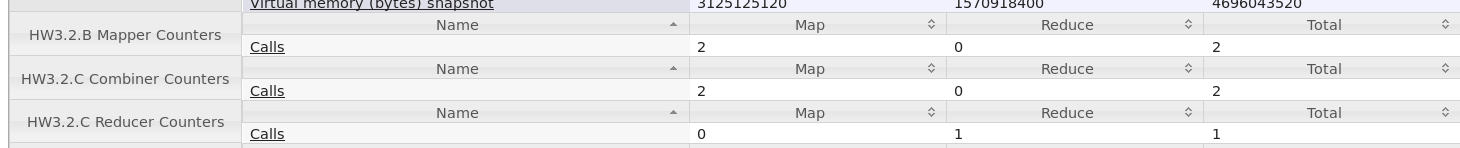

In [128]:
# INSERT SCREENSHOT OF JOB TRACKER UI COUNTERS
from IPython.display import Image, HTML
Image('HW32C.png')

<a name="3.2.1"></a>
### 3.2.1  
Using **2 reducers**: What are the top **50 most frequent terms** in your word count analysis? 

Present the top 50 terms and their frequency and their relative frequency. Present the top 50 terms and their frequency and their relative frequency. If there are ties please sort the tokens in alphanumeric/string order. Present bottom 10 tokens (least frequent items). Please **use a combiner.**

#### START STUDENT CODE HW321 (INSERT CELLS BELOW AS NEEDED)

**3.2.C Frequency Mapper**

In [152]:
%%writefile frequencies_mapper3.2.C.py
#!/usr/bin/env python
# START STUDENT CODE HW32CFREQMAPPER

import sys, csv, re

# Set up counters to monitor/understand the number of times a mapper task is run
sys.stderr.write("reporter:counter:HW3.2.C Mapper Counters,Calls,1\n")

ccd = csv.reader(sys.stdin)
for row in ccd:
    issue = row[3]
    if len(issue) > 0 and issue != 'Issue':
        words = re.findall(r'[a-z]+', issue.lower())
        for word in words:
            print '%s\t%s\t%s' % (word, 1,10)

# END STUDENT CODE HW32CFREQMAPPER

Overwriting frequencies_mapper3.2.C.py


**3.2.C Frequency Reducer**

In [165]:
%%writefile frequencies_reducer3.2.C.py
#!/usr/bin/env python
# START STUDENT CODE HW32CFREQREDUCER

import sys
# Set up counters to monitor/understand the number of times a reducer task is run
sys.stderr.write("reporter:counter:HW3.2.C Reducer Counters,Calls,1\n")

d = {}
total = 0
# For each line from the mapper output, split the three attributes 
# Spam/Ham classification, key term, value count
for line in sys.stdin:
    key,value,x = line.split("\t",2)
    
    # check if docClass + key term combination exist in dictionary
    # if so, update the term count value
    if key in d:
        d[key] += int(value)
        
    # if combination does not exist, add it to the dictionary
    else:
        d[key] = int(value)

for key, value in d.iteritems():
    total += int(value)
        
# for each value in the dictionary, print the 3 attributes in a 
# way that they can later be sorted appropriately
for key, value in d.iteritems():
    freq = 0
    freq = round((float(value) / float(total)),4)
    print '%s\t%s\t%s' % (key, value, freq)

# END STUDENT CODE HW32CFREQREDUCER

Overwriting frequencies_reducer3.2.C.py


**3.2.C Hadoop Calls**

In [266]:
# Hadoop command
# START STUDENT CODE HW32CFREQHADOOP

!chmod a+x frequencies_mapper3.2.C.py
!chmod a+x frequencies_reducer3.2.C.py

!hdfs dfs -rm ccd.csv 
!hdfs dfs -copyFromLocal ccd.csv
!hdfs dfs -rm -r HW3.2.C.freq-output

!hadoop jar /usr/lib/hadoop-0.20-mapreduce/contrib/streaming/hadoop-streaming-2.6.0-mr1-cdh5.8.0.jar \
  -files frequencies_mapper3.2.C.py,frequencies_reducer3.2.C.py \
  -reducer frequencies_reducer3.2.C.py \
  -combiner frequencies_reducer3.2.C.py \
  -mapper frequencies_mapper3.2.C.py \
  -input ccd.csv \
  -output HW3.2.C.freq-output \
  -numReduceTasks 2

# END STUDENT CODE HW32CFREQHADOOP

Deleted ccd.csv
Deleted HW3.2.C.freq-output
packageJobJar: [] [/usr/lib/hadoop-mapreduce/hadoop-streaming-2.6.0-cdh5.8.0.jar] /tmp/streamjob4385493534662397680.jar tmpDir=null
17/01/30 21:21:52 INFO client.RMProxy: Connecting to ResourceManager at /0.0.0.0:8032
17/01/30 21:21:52 INFO client.RMProxy: Connecting to ResourceManager at /0.0.0.0:8032
17/01/30 21:21:53 INFO mapred.FileInputFormat: Total input paths to process : 1
17/01/30 21:21:53 INFO mapreduce.JobSubmitter: number of splits:2
17/01/30 21:21:53 INFO mapreduce.JobSubmitter: Submitting tokens for job: job_1484544278544_0457
17/01/30 21:21:53 INFO impl.YarnClientImpl: Submitted application application_1484544278544_0457
17/01/30 21:21:53 INFO mapreduce.Job: The url to track the job: http://quickstart.cloudera:8088/proxy/application_1484544278544_0457/
17/01/30 21:21:53 INFO mapreduce.Job: Running job: job_1484544278544_0457
17/01/30 21:22:00 INFO mapreduce.Job: Job job_1484544278544_0457 running in uber mode : false
17/01/30 2

## 3.2.C Answer

**50 Most Frequent Terms**

In [267]:
# 3.2.C OUTPUT/ANSWER
!hdfs dfs -cat HW3.2.C.freq-output/part-0000* > HW3.2.C.freq_counts.txt
!cat HW3.2.C.freq_counts.txt | sort -k2,2nr | head -n50

loan	119630	0.1707
collection	72394	0.1033
foreclosure	70487	0.1047
modification	70487	0.1006
account	57448	0.0853
credit	55251	0.0821
or	40508	0.0602
payments	39993	0.0594
escrow	36767	0.0546
servicing	36767	0.0525
report	34903	0.0498
incorrect	29133	0.0433
information	29069	0.0415
on	29069	0.0432
debt	27874	0.0414
closing	19000	0.0282
not	18477	0.0274
attempts	17972	0.0256
collect	17972	0.0256
cont	17972	0.0256
d	17972	0.0256
owed	17972	0.0267
and	16448	0.0244
management	16205	0.0241
opening	16205	0.0231
of	13983	0.0208
my	10731	0.0153
deposits	10555	0.0157
withdrawals	10555	0.0151
problems	9484	0.0135
application	8868	0.0127
communication	8671	0.0124
tactics	8671	0.0129
broker	8625	0.0128
mortgage	8625	0.0123
originator	8625	0.0123
to	8401	0.0125
unable	8178	0.0121
billing	8158	0.0121
other	7886	0.0113
disclosure	7655	0.0114
verification	7655	0.0114
disputes	6938	0.0103
reporting	6559	0.0094
lease	6337	0.009
the	6248	0.0093
being	5663	0.0084
by	5663	0.0084
caused	5663	0.0084
funds	5

**10 Least Frequent Terms**

In [173]:
# 3.2.C OUTPUT/ANSWER
!hdfs dfs -cat HW3.2.C.freq-output/part-0000* > HW3.2.C.freq_counts.txt
!cat HW3.2.C.freq_counts.txt | sort -k2,2n | head -n10

disclosures	64	0.0001
missing	64	0.0001
amt	71	0.0001
day	71	0.0001
checks	75	0.0001
convenience	75	0.0001
credited	92	0.0001
payment	92	0.0001
amount	98	0.0001
apply	118	0.0002


#### END STUDENT CODE HW321

<a name="3.3"></a>
## HW3.3. Shopping Cart Analysis
Product Recommendations: The action or practice of selling additional products or services 
to existing customers is called cross-selling. Giving product recommendation is 
one of the examples of cross-selling that are frequently used by online retailers. 
One simple method to give product recommendations is to recommend products that are frequently
browsed together by the customers.
	
For this homework use the online browsing behavior dataset located at: 

       https://www.dropbox.com/s/zlfyiwa70poqg74/ProductPurchaseData.txt?dl=0

Each line in this dataset represents a browsing session of a customer. 
On each line, each string of 8 characters represents the id of an item browsed during that session. 
The items are separated by spaces.

Here are the first few lines of the ProductPurchaseData 
FRO11987 ELE17451 ELE89019 SNA90258 GRO99222 
GRO99222 GRO12298 FRO12685 ELE91550 SNA11465 ELE26917 ELE52966 FRO90334 SNA30755 ELE17451 FRO84225 SNA80192 
ELE17451 GRO73461 DAI22896 SNA99873 FRO86643 
ELE17451 ELE37798 FRO86643 GRO56989 ELE23393 SNA11465 
ELE17451 SNA69641 FRO86643 FRO78087 SNA11465 GRO39357 ELE28573 ELE11375 DAI54444 


Do some exploratory data analysis of this dataset guided by the following questions:. 

How many unique items are available from this supplier?

Using a single reducer: Report your findings such as number of unique products; largest basket; report the top 50 most frequently purchased items,  their frequency,  and their relative frequency (break ties by sorting the products alphabetical order) etc. using Hadoop Map-Reduce. 

#### START STUDENT CODE HW33 (INSERT CELLS BELOW AS NEEDED)

In [174]:
!curl 'https://www.dropbox.com/s/zlfyiwa70poqg74/ProductPurchaseData.txt?dl=0' -L -o ProductPurchaseData.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 3377k  100 3377k    0     0  1371k      0  0:00:02  0:00:02 --:--:-- 2356k


In [175]:
!head ProductPurchaseData.txt

FRO11987 ELE17451 ELE89019 SNA90258 GRO99222 
GRO99222 GRO12298 FRO12685 ELE91550 SNA11465 ELE26917 ELE52966 FRO90334 SNA30755 ELE17451 FRO84225 SNA80192 
ELE17451 GRO73461 DAI22896 SNA99873 FRO86643 
ELE17451 ELE37798 FRO86643 GRO56989 ELE23393 SNA11465 
ELE17451 SNA69641 FRO86643 FRO78087 SNA11465 GRO39357 ELE28573 ELE11375 DAI54444 
ELE17451 GRO73461 DAI22896 SNA99873 FRO18919 DAI50921 SNA80192 GRO75578 
ELE17451 ELE59935 FRO18919 ELE23393 SNA80192 SNA85662 SNA91554 DAI22177 
ELE17451 SNA69641 FRO18919 SNA90258 ELE28573 ELE11375 DAI14125 FRO78087 
ELE17451 GRO73461 DAI22896 SNA80192 SNA85662 SNA90258 DAI46755 FRO81176 ELE66810 DAI49199 DAI91535 GRO94758 ELE94711 DAI22177 
ELE17451 SNA69641 DAI91535 GRO94758 GRO99222 FRO76833 FRO81176 SNA80192 DAI54690 ELE37798 GRO56989 


**3.3 Mapper**

In [176]:
%%writefile mapper3.3.py
#!/usr/bin/env python

import sys

# Set up counters to monitor/understand the number of times a mapper task is run
sys.stderr.write("reporter:counter:HW3.3 Mapper Counters,Calls,1\n")

for line in sys.stdin:
    prods = line.split()
    for item in prods:
        print '%s\t%s\t%s' % (item, 1,10)

Writing mapper3.3.py


**3.3 Reducer**

In [179]:
%%writefile reducer3.3.py
#!/usr/bin/env python

import sys
# Set up counters to monitor/understand the number of times a reducer task is run
sys.stderr.write("reporter:counter:HW3.3 Reducer Counters,Calls,1\n")

d = {}
total = 0
# For each line from the mapper output, split the three attributes 
# Spam/Ham classification, key term, value count
for line in sys.stdin:
    key,value,x = line.split("\t",2)
    
    # check if docClass + key term combination exist in dictionary
    # if so, update the term count value
    if key in d:
        d[key] += int(value)
        
    # if combination does not exist, add it to the dictionary
    else:
        d[key] = int(value)

for key, value in d.iteritems():
    total += int(value)
        
# for each value in the dictionary, print the 3 attributes in a 
# way that they can later be sorted appropriately
for key, value in d.iteritems():
    freq = 0
    freq = round((float(value) / float(total)),4)
    print '%s\t%s\t%s' % (key, value, freq)

Overwriting reducer3.3.py


**3.3 Hadoop Calls**

In [185]:
# Hadoop command

!chmod a+x mapper3.3.py
!chmod a+x reducer3.3.py

!hdfs dfs -rm ProductPurchaseData.txt
!hdfs dfs -copyFromLocal ProductPurchaseData.txt
!hdfs dfs -rm -r HW3.3-output

!hadoop jar /usr/lib/hadoop-0.20-mapreduce/contrib/streaming/hadoop-streaming-2.6.0-mr1-cdh5.8.0.jar \
  -files mapper3.3.py,reducer3.3.py \
  -reducer reducer3.3.py \
  -combiner reducer3.3.py \
  -mapper mapper3.3.py \
  -input ProductPurchaseData.txt \
  -output HW3.3-output \
  -numReduceTasks 1

Deleted ProductPurchaseData.txt
Deleted HW3.3-output
packageJobJar: [] [/usr/lib/hadoop-mapreduce/hadoop-streaming-2.6.0-cdh5.8.0.jar] /tmp/streamjob6402019114965539630.jar tmpDir=null
17/01/29 17:08:42 INFO client.RMProxy: Connecting to ResourceManager at /0.0.0.0:8032
17/01/29 17:08:43 INFO client.RMProxy: Connecting to ResourceManager at /0.0.0.0:8032
17/01/29 17:08:43 INFO mapred.FileInputFormat: Total input paths to process : 1
17/01/29 17:08:43 INFO mapreduce.JobSubmitter: number of splits:2
17/01/29 17:08:43 INFO mapreduce.JobSubmitter: Submitting tokens for job: job_1484544278544_0432
17/01/29 17:08:44 INFO impl.YarnClientImpl: Submitted application application_1484544278544_0432
17/01/29 17:08:44 INFO mapreduce.Job: The url to track the job: http://quickstart.cloudera:8088/proxy/application_1484544278544_0432/
17/01/29 17:08:44 INFO mapreduce.Job: Running job: job_1484544278544_0432
17/01/29 17:08:50 INFO mapreduce.Job: Job job_1484544278544_0432 running in uber mode : false
1

## 3.3 ANSWER

**Top 50 Items**

In [187]:
# 3.3 OUTPUT/ANSWER
!hdfs dfs -cat HW3.3-output/part-0000* > HW3.3counts.txt
!cat HW3.3counts.txt | sort -k2,2nr | head -n50

DAI62779	6667	0.0175
FRO40251	3881	0.0102
ELE17451	3875	0.0102
GRO73461	3602	0.0095
SNA80324	3044	0.008
ELE32164	2851	0.0075
DAI75645	2736	0.0072
SNA45677	2455	0.0064
FRO31317	2330	0.0061
DAI85309	2293	0.006
ELE26917	2292	0.006
FRO80039	2233	0.0059
GRO21487	2115	0.0056
SNA99873	2083	0.0055
GRO59710	2004	0.0053
GRO71621	1920	0.005
FRO85978	1918	0.005
GRO30386	1840	0.0048
ELE74009	1816	0.0048
GRO56726	1784	0.0047
DAI63921	1773	0.0047
GRO46854	1756	0.0046
ELE66600	1713	0.0045
DAI83733	1712	0.0045
FRO32293	1702	0.0045
ELE66810	1697	0.0045
SNA55762	1646	0.0043
DAI22177	1627	0.0043
FRO78087	1531	0.004
ELE99737	1516	0.004
ELE34057	1489	0.0039
GRO94758	1489	0.0039
FRO35904	1436	0.0038
FRO53271	1420	0.0037
SNA93860	1407	0.0037
SNA90094	1390	0.0036
GRO38814	1352	0.0036
ELE56788	1345	0.0035
GRO61133	1321	0.0035
DAI88807	1316	0.0035
ELE74482	1316	0.0035
ELE59935	1311	0.0034
SNA96271	1295	0.0034
DAI43223	1290	0.0034
ELE91337	1289	0.0034
GRO15017	1275	0.0033
DAI31081	1261	0.0033
GRO81087	1220	0.0032

**Number of Unique Items**

In [186]:
!cat HW3.3counts.txt | wc -l

12592


#### END STUDENT CODE HW33

<a name="3.3.1"></a>
## HW3.3.1 OPTIONAL 
Using 2 reducers:  Report your findings such as number of unique products; largest basket; report the top 50 most frequently purchased items,  their frequency,  and their relative frequency (break ties by sorting the products alphabetical order) etc. using Hadoop Map-Reduce. 

#### START STUDENT CODE HW331 (INSERT CELLS BELOW AS NEEDED)

#### END STUDENT CODE HW331

<a name="3.4"></a>
## HW3.4. (Computationally prohibitive but then again Hadoop can handle this) Pairs

Suppose we want to recommend new products to the customer based on the products they
have already browsed on the online website. Write a map-reduce program 
to find products which are frequently browsed together. Fix the support count (cooccurence count) to s = 100 
(i.e. product pairs need to occur together at least 100 times to be considered frequent) 
and find pairs of items (sometimes referred to itemsets of size 2 in association rule mining) that have a support count of 100 or more.

List the top 50 product pairs with corresponding support count (aka frequency), and relative frequency or support (number of records where they coccur, the number of records where they coccur/the number of baskets in the dataset)  in decreasing order of support  for frequent (100>count) itemsets of size 2. 

Use the Pairs pattern (lecture 3)  to  extract these frequent itemsets of size 2. Free free to use combiners if they bring value. Instrument your code with counters for count the number of times your mapper, combiner and reducers are called.  

Please output records of the following form for the top 50 pairs (itemsets of size 2): 

      item1, item2, support count, support



Fix the ordering of the pairs lexicographically (left to right), 
and break ties in support (between pairs, if any exist) 
by taking the first ones in lexicographically increasing order. 

Report  the compute time for the Pairs job. Describe the computational setup used (E.g., single computer; dual core; linux, number of mappers, number of reducers)
Instrument your mapper, combiner, and reducer to count how many times each is called using Counters and report these counts.

#### START STUDENT CODE HW34 (INSERT CELLS BELOW AS NEEDED)

In [47]:
%%writefile mapper3.4.py
#!/usr/bin/env python

import sys

# Set up counters to monitor/understand the number of times a mapper task is run
sys.stderr.write("reporter:counter:HW3.4 Mapper Counters,Calls,1\n")

for line in sys.stdin:
    prods = line.split()
    # The outer loop runs through each individual item in a basket
    for item1 in prods:
        # The inner loop sorts through all of the other basket items and creates an interaction
        for item2 in prods:
            if item1 != item2:
                
                # the '10' is just a placeholder because the reducer is going to have 4 outputs
                print '%s\t%s\t%s\t%s' % (item1, item2, 1,10)

Overwriting mapper3.4.py


In [99]:
%%writefile reducer3.4.py
#!/usr/bin/env python

import sys
from collections import defaultdict

# Set up counters to monitor/understand the number of times a reducer task is run
sys.stderr.write("reporter:counter:HW3.4 Reducer Counters,Calls,1\n")

d = defaultdict(int)
total = 0

for line in sys.stdin:
    
    # the x is actually only a placeholder because the true input only has 3 relevant fields,
    # but the output has 4
    prod1,prod2,count,x = line.split('\t',3)
    prod1 = prod1.strip()
    prod2 = prod2.strip()
    count = int(count)

    # add the count to the dictionary where appropriate
    if (prod1, prod2) in d:
        d[(prod1,prod2)] += count
    else:
    #elif (prod2, prod1) not in d:
        d[(prod1,prod2)] = count

# Calculate the total number of product interactions
for key, value in d.iteritems():
    if value >= 100:
        total += int(value)
        
# As mentioned in the prompt, calculate the relative frequency of each product combination, 
# but only for ones that have at least 100 co-occurrences
for key, value in d.iteritems():
    if value >= 100:
        freq = 0
        freq = round((float(value) / float(total)),4)
        print '%s\t%s\t%s\t%s' % (key[0], key[1], value, freq)

Overwriting reducer3.4.py


**Hadoop Calls**

In [100]:
# Hadoop commands

!chmod a+x mapper3.4.py
!chmod a+x reducer3.4.py

!hdfs dfs -rm ProductPurchaseData.txt
!hdfs dfs -copyFromLocal ProductPurchaseData.txt
!hdfs dfs -rm -r HW3.4-output

!hadoop jar /usr/lib/hadoop-0.20-mapreduce/contrib/streaming/hadoop-streaming-2.6.0-mr1-cdh5.8.0.jar \
  -files mapper3.4.py,reducer3.4.py \
  -reducer reducer3.4.py \
  -combiner reducer3.4.py \
  -mapper mapper3.4.py \
  -input ProductPurchaseData.txt \
  -output HW3.4-output \
  -numReduceTasks 1

Deleted ProductPurchaseData.txt
Deleted HW3.4-output
packageJobJar: [] [/usr/lib/hadoop-mapreduce/hadoop-streaming-2.6.0-cdh5.8.0.jar] /tmp/streamjob2065350177640137035.jar tmpDir=null
17/01/31 00:39:58 INFO client.RMProxy: Connecting to ResourceManager at /0.0.0.0:8032
17/01/31 00:39:58 INFO client.RMProxy: Connecting to ResourceManager at /0.0.0.0:8032
17/01/31 00:39:59 INFO mapred.FileInputFormat: Total input paths to process : 1
17/01/31 00:39:59 INFO mapreduce.JobSubmitter: number of splits:2
17/01/31 00:39:59 INFO mapreduce.JobSubmitter: Submitting tokens for job: job_1484544278544_0486
17/01/31 00:40:00 INFO impl.YarnClientImpl: Submitted application application_1484544278544_0486
17/01/31 00:40:00 INFO mapreduce.Job: The url to track the job: http://quickstart.cloudera:8088/proxy/application_1484544278544_0486/
17/01/31 00:40:00 INFO mapreduce.Job: Running job: job_1484544278544_0486
17/01/31 00:40:07 INFO mapreduce.Job: Job job_1484544278544_0486 running in uber mode : false
1

**3.4 ANSWER**

**Pairs Job Runtime:** 
26 seconds

**My personal PC:**
Single PC, 4 cores, 16GB RAM, MacOS

**My Virtual Machine:**
3 processors, 9GB RAM, Linux

**MapReduce Configuration:**
2 Mappers, 1 Reducer, 2 Map Calls, 5 Reducer Calls

In [101]:
# 3.4 OUTPUT/ANSWER
!hdfs dfs -cat HW3.4-output/part-0000* > HW3.4counts.txt
!cat HW3.4counts.txt | sort -k1,2 | head -n50

DAI22177	DAI62779	327	0.0017
DAI22177	DAI85309	128	0.0007
DAI22177	FRO85978	106	0.0005
DAI22177	GRO73461	146	0.0007
DAI22240	ELE37048	113	0.0006
DAI22896	DAI62779	261	0.0013
DAI22896	DAI75645	127	0.0006
DAI22896	GRO38814	141	0.0007
DAI22896	GRO73461	211	0.0011
DAI22896	SNA72163	102	0.0005
DAI23334	DAI62779	247	0.0013
DAI23334	ELE92920	140	0.0007
DAI31081	DAI62779	330	0.0017
DAI31081	DAI75645	122	0.0006
DAI31081	ELE17451	104	0.0005
DAI31081	ELE32164	265	0.0013
DAI31081	FRO40251	173	0.0009
DAI31081	GRO73461	159	0.0008
DAI31081	SNA80324	110	0.0006
DAI35347	DAI62779	107	0.0005
DAI35347	ELE66810	175	0.0009
DAI35347	FRO31317	284	0.0014
DAI42083	DAI92600	256	0.0013
DAI42083	ELE17451	107	0.0005
DAI42493	DAI62779	195	0.001
DAI42493	ELE17451	138	0.0007
DAI42493	ELE32164	196	0.001
DAI42493	ELE92920	125	0.0006
DAI42493	FRO40251	141	0.0007
DAI42493	GRO59710	193	0.001
DAI43223	DAI62779	418	0.0021
DAI43223	ELE17451	272	0.0014
DAI43223	ELE32164	624	0.0032
DAI43223	ELE92920	102	0.0005
DAI43223	GRO59710

#### END STUDENT CODE HW34

<a name="3.5"></a>
## HW3.5: Stripes
Repeat 3.4 using the stripes design pattern for finding cooccuring pairs.

Report  the compute times for stripes job versus the Pairs job. Describe the computational setup used (E.g., single computer; dual core; linux, number of mappers, number of reducers)

Instrument your mapper, combiner, and reducer to count how many times each is called using Counters and report these counts. Discuss the differences in these counts between the Pairs and Stripes jobs


#### START STUDENT CODE HW35 (INSERT CELLS BELOW AS NEEDED)

**3.5 Mapper**

In [50]:
%%writefile mapper3.5.py
#!/usr/bin/env python

import sys
from collections import defaultdict
# Set up counters to monitor/understand the number of times a mapper task is run
sys.stderr.write("reporter:counter:HW3.5 Mapper Counters,Calls,1\n")
d = {}
for line in sys.stdin:
    line.strip()
    prods = line.split()
    
    # The outer loop runs through each individual item in a basket
    for item1 in prods:
        if item1 not in d:
            d[item1] = {}
        
        # The inner loop sorts through all of the other basket items and creates an interaction
        for item2 in prods:
            if item1 != item2:
                
                # This section is creating a hash table for the product interactions
                if item2 in d[item1]:
                    d[item1][item2] += 1
                else:
                    d[item1][item2] = 1

for key in d.iteritems():
    print '%s\t%s' % (key[0], key[1])

Overwriting mapper3.5.py


**3.5 Combiner**

In [102]:
%%writefile combiner3.5.py
#!/usr/bin/env python

import sys
from collections import defaultdict
import ast

# Set up counters to monitor/understand the number of times a reducer task is run
sys.stderr.write("reporter:counter:HW3.5 Reducer Counters,Calls,1\n")

d = defaultdict(int)

for line in sys.stdin:
    
    prod,stripe = line.split('\t')
    prod = prod.strip()
    
    # this will take the string and convert it to a dictionary    
    stripe = ast.literal_eval(stripe)
    

    # add the count to the dictionary where appropriate
    if prod in d:
        for key in stripe.iteritems():
            if key[0] in d[prod]:
                d[prod][key[0]] += stripe[key[0]]
            else:
                d[prod][key[0]] = stripe[key[0]]
    else:
        d[prod] = stripe

for key in d.iteritems():
    print '%s\t%s' % (key[0], key[1])

Overwriting combiner3.5.py


**3.5 Reducer**

In [103]:
%%writefile reducer3.5.py
#!/usr/bin/env python

import sys
from collections import defaultdict
import ast

# Set up counters to monitor/understand the number of times a reducer task is run
sys.stderr.write("reporter:counter:HW3.5 Reducer Counters,Calls,1\n")

d = defaultdict(int)
total = 0

for line in sys.stdin:

    prod,stripe = line.split('\t')
    prod = prod.strip()
    
    # this will take the string and convert it to a dictionary
    stripe = ast.literal_eval(stripe)

    # add the count to the dictionary where appropriate
    if prod in d:
        for key in stripe.iteritems():
            if key[0] in d[prod]:
                d[prod][key[0]] += stripe[key[0]]
            else:
                d[prod][key[0]] = stripe[key[0]]
    else:
        d[prod] = stripe

        
# increment the total amount
for key in d.iteritems():
    for key2, value in key[1].iteritems():
        if value >= 100:
            total += int(value)

# calculate the frequency and print the values
for key in d.iteritems():
    for key2, value in key[1].iteritems():
        if value >= 100:
            freq = 0
            freq = round((float(value) / float(total)), 4)
            print '%s\t%s\t%s\t%s' % (key[0], key2, value, freq)

Overwriting reducer3.5.py


**Hadoop Calls**

In [105]:
# Hadoop commands

!chmod a+x mapper3.5.py
!chmod a+x reducer3.5.py
!chmod a+x combiner3.5.py

!hdfs dfs -rm ProductPurchaseData.txt
!hdfs dfs -copyFromLocal ProductPurchaseData.txt
!hdfs dfs -rm -r HW3.5-output

!hadoop jar /usr/lib/hadoop-0.20-mapreduce/contrib/streaming/hadoop-streaming-2.6.0-mr1-cdh5.8.0.jar \
  -files mapper3.5.py,combiner3.5.py,reducer3.5.py \
  -reducer reducer3.5.py \
  -combiner combiner3.5.py \
  -mapper mapper3.5.py \
  -input ProductPurchaseData.txt \
  -output HW3.5-output \
  -numReduceTasks 1

Deleted ProductPurchaseData.txt
Deleted HW3.5-output
packageJobJar: [] [/usr/lib/hadoop-mapreduce/hadoop-streaming-2.6.0-cdh5.8.0.jar] /tmp/streamjob1532552472890765337.jar tmpDir=null
17/01/31 00:43:30 INFO client.RMProxy: Connecting to ResourceManager at /0.0.0.0:8032
17/01/31 00:43:31 INFO client.RMProxy: Connecting to ResourceManager at /0.0.0.0:8032
17/01/31 00:43:31 INFO mapred.FileInputFormat: Total input paths to process : 1
17/01/31 00:43:31 INFO mapreduce.JobSubmitter: number of splits:2
17/01/31 00:43:31 INFO mapreduce.JobSubmitter: Submitting tokens for job: job_1484544278544_0487
17/01/31 00:43:32 INFO impl.YarnClientImpl: Submitted application application_1484544278544_0487
17/01/31 00:43:32 INFO mapreduce.Job: The url to track the job: http://quickstart.cloudera:8088/proxy/application_1484544278544_0487/
17/01/31 00:43:32 INFO mapreduce.Job: Running job: job_1484544278544_0487
17/01/31 00:43:39 INFO mapreduce.Job: Job job_1484544278544_0487 running in uber mode : false
1

**Pairs Job Runtime:** 
39 seconds

**My personal PC:**
Single PC, 4 cores, 16GB RAM, MacOS

**My Virtual Machine:**
3 processors, 9GB RAM, Linux

**MapReduce Configuration:**
2 Mappers, 1 Reducer, 2 Map Calls, 3 Reducer Calls

In [106]:
# 3.5 OUTPUT/ANSWER
!hdfs dfs -cat HW3.5-output/part-0000* > HW3.5counts.txt
!cat HW3.5counts.txt | sort -k1,2 | head -n50

DAI16732	FRO78087	106	0.0002
DAI18527	SNA44451	102	0.0002
DAI22177	DAI31081	127	0.0003
DAI22177	DAI62779	382	0.0008
DAI22177	DAI63921	136	0.0003
DAI22177	DAI75645	123	0.0003
DAI22177	DAI83733	126	0.0003
DAI22177	DAI85309	172	0.0004
DAI22177	ELE17451	203	0.0004
DAI22177	ELE26917	134	0.0003
DAI22177	ELE32164	155	0.0003
DAI22177	ELE34057	107	0.0002
DAI22177	ELE56788	134	0.0003
DAI22177	ELE66600	101	0.0002
DAI22177	ELE66810	105	0.0002
DAI22177	ELE74009	108	0.0002
DAI22177	ELE91337	150	0.0003
DAI22177	FRO31317	160	0.0003
DAI22177	FRO32293	128	0.0003
DAI22177	FRO40251	181	0.0004
DAI22177	FRO66272	130	0.0003
DAI22177	FRO78087	107	0.0002
DAI22177	FRO80039	152	0.0003
DAI22177	FRO85978	156	0.0003
DAI22177	GRO21487	122	0.0003
DAI22177	GRO30386	106	0.0002
DAI22177	GRO46854	160	0.0003
DAI22177	GRO59710	120	0.0002
DAI22177	GRO71621	132	0.0003
DAI22177	GRO73461	248	0.0005
DAI22177	SNA45677	145	0.0003
DAI22177	SNA55762	102	0.0002
DAI22177	SNA80324	140	0.0003
DAI22177	SNA99873	148	0.0003
DAI22240	DAI62

#### END STUDENT CODE HW35

# OPTIONAL
QUESTIONS  BELOW THIS LINE ARE OPTIONAL

<a name="3.6"></a>
## HW3.6 Computing Relative Frequencies on 100K WikiPedia pages (93Meg)

Dataset description
For this assignment you will explore a set of 100,000 Wikipedia documents:

https://www.dropbox.com/s/n5lfbnztclo93ej/wikitext_100k.txt?dl=0
s3://cs9223/wikitext_100k.txt, or
https://s3.amazonaws.com/cs9223/wikitext_100k.txt
Each line in this file consists of the plain text extracted from a Wikipedia document.

Task
Compute the relative frequencies of each word that occurs in the documents in wikitext_100k.txt and output the top 100 word pairs sorted by decreasing order of relative frequency.

Recall that the relative frequency (RF) of word B given word A is defined as follows:

   f(B|A) = Count(A, B) / Count (A)   =  Count(A, B) / sum_B'(Count (A, B')

where count(A,B) is the number of times A and B co-occur within a window of two words (co-occurrence window size of two) in a document and count(A) the number of times A occurs with anything else. Intuitively, given a document collection, the relative frequency captures the proportion of time the word B appears in the same document as A. (See Section 3.3, in Data-Intensive Text Processing with MapReduce).

In the async lecture you learned different approaches to do this, and in this assignment, you will implement them:

a.	Write a mapreduce program which uses the Stripes approach and writes its output in a file named rfstripes.txt 

b.	Write a mapreduce program which uses the Pairs approach and writes its output in a file named rfpairs.txt

c.	Compare the performance of the two approaches and output the relative performance to a file named rfcomp.txt. Compute the relative performance as follows: (running time for Pairs/ running time for Stripes). Also include an analysis comparing the communication costs for the two approaches. Instrument your mapper and reduces for counters where necessary to aid with your analysis.

NOTE: please limit your analysis to the top 100 word pairs sorted by decreasing order of relative frequency for each word (tokens with all alphabetical letters).

Please include markdown cell named rf.txt that describes the following:

the input/output format in each Hadoop task, i.e., the keys for the mappers and reducers
the Hadoop cluster settings you used, i.e., number of mappers and reducers
the running time for each approach: pairs and stripes

You can write your program using Python or MrJob (with Hadoop streaming) and you should run it on AWS. It is a good idea to develop and test your program on a local machine  before deploying on AWS. Remember your notebook, needs to have all the commands you used to run each Mapreduce job (i.e., pairs and stripes) -- include the Hadoop streaming commands you used to run your jobs.

In addition the All the following files should be compressed in one ZIP file and submitted. The ZIP file should contain:


A.	The result files: rfstripes.txt, rfpairs.txt, rfcomp.txt

Prior to working with Hadoop, the corpus should first be preprocessed as follows:
perform tokenization (whitespace and all non-alphabetic characters) and stopword removal  using standard tools from the Lucene search engine. All tokens should  then be replaced
with unique integers for a more efficient encoding. 


== Preliminary information for the remaing HW problems===

Much of this homework beyond this point will focus on the Apriori algorithm for frequent itemset  mining and the additional step for extracting association rules from these frequent itemsets.
Please acquaint yourself with the background information (below)
before approaching the remaining  assignments.

=== Apriori background information ===

Some background material for the  Apriori algorithm is located at:

 - Slides in Live Session #3
 - https://en.wikipedia.org/wiki/Apriori_algorithm
 - https://www.dropbox.com/s/k2zm4otych279z2/Apriori-good-slides.pdf?dl=0
 - http://snap.stanford.edu/class/cs246-2014/slides/02-assocrules.pdf

Association Rules are frequently used for Market Basket Analysis (MBA) by retailers to
understand the purchase behavior of their customers. This information can be then used for
many different purposes such as cross-selling and up-selling of products, sales promotions,
loyalty programs, store design, discount plans and many others.
Evaluation of item sets: Once you have found the frequent itemsets of a dataset, you need
to choose a subset of them as your recommendations. Commonly used metrics for measuring
significance and interest for selecting rules for recommendations are: confidence; lift; and conviction.

<a name="3.7"></a>
## HW3.7 Apriori Algorithm
What is the Apriori algorithm? Describe an example use in your domain of expertise and what kind of . Define confidence and lift.

NOTE:
For the remaining homework use the online browsing behavior dataset located at (same dataset as used above): 

       https://www.dropbox.com/s/zlfyiwa70poqg74/ProductPurchaseData.txt?dl=0

Each line in this dataset represents a browsing session of a customer. 
On each line, each string of 8 characters represents the id of an item browsed during that session. 
The items are separated by spaces.

Here are the first few lines of the ProductPurchaseData 
FRO11987 ELE17451 ELE89019 SNA90258 GRO99222 
GRO99222 GRO12298 FRO12685 ELE91550 SNA11465 ELE26917 ELE52966 FRO90334 SNA30755 ELE17451 FRO84225 SNA80192 
ELE17451 GRO73461 DAI22896 SNA99873 FRO86643 
ELE17451 ELE37798 FRO86643 GRO56989 ELE23393 SNA11465 
ELE17451 SNA69641 FRO86643 FRO78087 SNA11465 GRO39357 ELE28573 ELE11375 DAI54444 

<a name="3.8"></a>
## HW3.8. Shopping Cart Analysis
Product Recommendations: The action or practice of selling additional products or services 
to existing customers is called cross-selling. Giving product recommendation is 
one of the examples of cross-selling that are frequently used by online retailers. 
One simple method to give product recommendations is to recommend products that are frequently
browsed together by the customers.

Suppose we want to recommend new products to the customer based on the products they
have already browsed on the online website. Write a program using the A-priori algorithm
to find products which are frequently browsed together. Fix the support to s = 100 
(i.e. product sets need to occur together at least 100 times to be considered frequent) 
and find itemsets of size 2 and 3.

Then extract association rules from these frequent items. 

A rule is of the form: 

(item1, item5) ⇒ item2.

List the top 10 discovered rules in descreasing order of confidence in the following format
 
(item1, item5) ⇒ item2, supportCount ,support, confidence

<a name="3.8.1"></a>
## HW3.8.1

Benchmark your results using the pyFIM implementation of the Apriori algorithm
(Apriori - Association Rule Induction / Frequent Item Set Mining implemented by Christian Borgelt). 
You can download pyFIM from here: 

http://www.borgelt.net/pyfim.html

Comment on the results from both implementations (your Hadoop MapReduce of apriori versus pyFIM) 
in terms of results and execution times.

END OF HOMEWORK
===============